In [1]:
import requests
import pandas as pd
import io
import datetime as dt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from IPython.display import JSON
#import seaborn as sns
#sns.set()
%matplotlib inline

In [2]:
csv = requests.get("https://opendata.arcgis.com/datasets/37abda537d17458bae6677b8ab75fcb9_0.csv").content
main_df = pd.read_csv(io.StringIO(csv.decode('utf-8')))

1. Filtering out "Hospitalizations"

In [3]:
filt = main_df["Hospitalized"] == "YES"
df = main_df[filt]

2. Changing 'EventDate' to more manageable structure

In [4]:
df.loc[:,'EventDate'] = pd.to_datetime(df.loc[:,'EventDate'],format='%Y/%m/%d %H:%M:%S')
df.loc[:,"FormattedEventDate"] = df.loc[:,"EventDate"].dt.strftime("%m/%d/%Y")
df.loc[:,"EventDate"] = pd.to_datetime(df.loc[:,"FormattedEventDate"],format='%m/%d/%Y')
df = df.iloc[:,[0,1,2,3,7,8,9,13,16]]

C:\Users\kpess\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\kpess\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [5]:
df.head(3)

,County,Age,Age_group,Gender,EDvisit,Hospitalized,Died,EventDate,FormattedEventDate
40,Palm Beach,45.0,45-54 years,Male,YES,YES,NaN,2020-06-26,06/26/2020
50,Dade,67.0,65-74 years,Female,YES,YES,NaN,2020-06-29,06/29/2020
57,Volusia,95.0,85+ years,Female,YES,YES,NaN,2020-06-28,06/28/2020


In [9]:
hospitalized_df = df.groupby("EventDate").count().reset_index()[['EventDate','Hospitalized']]
df.groupby("EventDate").count()['Hospitalized'].tail(20)

EventDate
2020-06-26    294
2020-06-27    269
2020-06-28    253
2020-06-29    308
2020-06-30    273
2020-07-01    298
2020-07-02    237
2020-07-03    214
2020-07-04    196
2020-07-05    194
2020-07-06    194
2020-07-07    187
2020-07-08    149
2020-07-09    150
2020-07-10    123
2020-07-11     87
2020-07-12     88
2020-07-13     64
2020-07-14     43
2020-07-15     20
Name: Hospitalized, dtype: int64

(737531.8073924732, 737621.8073924732)

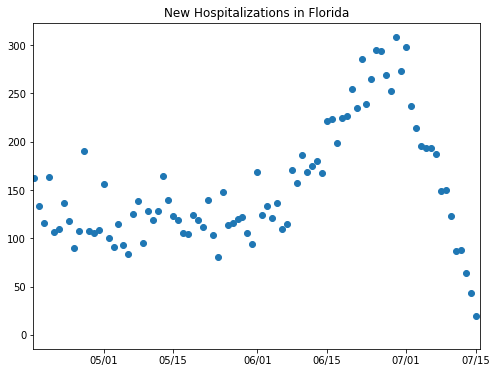

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.scatter(mpl.dates.date2num(hospitalized_df['EventDate']),hospitalized_df["Hospitalized"])
ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))
ax.xaxis_date()
plt.title(label="New Hospitalizations in Florida")
plt.xlim(left=plt.xlim()[1]-99,right=plt.xlim()[1]-9)